## Webscraping: Chicago Restaurants - TripAdvisor

### Step-1: Scraping details of Chicago restaurants from TripAdvisor using Beautiful Soup

In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urlencode
from urllib.request import Request, urlopen
from pprint import pprint
import requests, csv, time, re
import numpy as np


url = r'https://www.tripadvisor.com/Restaurants-g35805-Chicago_Illinois.html'
root = 'https://www.tripadvisor.com/'

# Creating request headers
req_headers = {}
req_headers['user-agent'] = r'Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 \
                        (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17 AdsBot-Google'

page = requests.get(url, headers=req_headers)


# Requesting data from the website
soup = BeautifulSoup(page.text, 'lxml')
#print(soup.prettify())


headers = ['Name', 'Rating', 'Review Count', 'Price', 'Cuisine']
with open('triprestro_test.csv','w', newline='') as f:
    f_csv = csv.DictWriter(f, headers)
    f_csv.writeheader()

counter = 1
while (counter <= 99):
    for div in soup.find_all("div", class_="ui_columns is-mobile"):
        name = div.find("a", class_='property_title').text.replace('\n', ' ').strip()
        
        rating = div.select('span[class*=ui_bubble_rating]')[0]['alt'].split()[0]
        
        num_review_x = div.select('span[class*=reviewCount]')
        if len(num_review_x) != 0:
            num_review = num_review_x[0].text.replace('\n', '').replace('reviews', '').strip()
        else:
            num_review = div.select('a[class*=reviewCount]')[0].text.replace('\n', '').split()[0]
        
        num_reviews = int(num_review.replace(',' , ''))
        
        pricing_x = div.find("span", class_='item price')
        if pricing_x is not None:
            pricing_list = div.find("span", class_='item price').text.split()
        else:
            pricing_list = [' ']
            
        if len(pricing_list) > 1:
            pricing = (pricing_list[0].count('$') + pricing_list[-1].count('$')) / 2
        else:
            pricing = pricing_list[0].count('$')
        
        cuisine_x = div.find("a", class_='item cuisine')
        if cuisine_x is not None:
            cuisine = div.find("a", class_='item cuisine').text.replace('\n', ' ')
        else:
            cuisine = ' '
            
        post_line = [name, rating, num_reviews, pricing, cuisine]
        with open('triprestro_test.csv', 'a', newline='', encoding="utf-8") as f:
            writer = csv.writer(f)
            writer.writerow(post_line)
        
    next_button = soup.find("a", class_='nav next rndBtn ui_button primary taLnk').attrs['href']
    print('Next Page:', root + next_button)
    time.sleep(2)
    page = requests.get(root+next_button, headers=req_headers)
    soup = BeautifulSoup(page.text, 'lxml')
    counter += 1

Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa30-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa60-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa90-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa120-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa150-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa180-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa210-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa240-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa270-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvi

Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2310-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2340-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2370-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2400-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2430-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2460-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2490-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2520-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://www.tripadvisor.com//Restaurants-g35805-oa2550-Chicago_Illinois.html#EATERY_LIST_CONTENTS
Next Page: https://

### Step-2: Building dataframe from the data scraped

In [2]:
%matplotlib inline
import pandas as pd

trip_df = "triprestro_test.csv"
df = pd.read_csv(trip_df, encoding="latin-1")
print(df.head(10))
print('\n', '='*60, '\n')

print('Rows with Null values:\n', pd.isnull(df).any())
print('\n', '='*60, '\n')

print("Number of duplicate rows: \n")
print(df.loc[df.duplicated(), :].count())
print('\n', '='*60, '\n')

print("Info of the Dataframe: \n")
df.info()

                                      Name  Rating  Review Count  Price  \
0                              Ocean Prime     5.0             6    2.5   
1  Joe's Seafood, Prime Steak & Stone Crab     4.5          3982    4.0   
2                        The Chicago Diner     5.0           238    2.5   
3           The Polo Inn Bridgeport U.S.A.     5.0           295    2.5   
4                          Girl & The Goat     4.5          3097    2.5   
5                                 Steak 48     4.5           248    4.0   
6                          Boka Restaurant     4.5           605    4.0   
7              Wildberry Pancakes and Cafe     4.5          4263    2.5   
8                       The Capital Grille     4.5           971    4.0   
9                                   Alinea     4.5          1442    4.0   

      Cuisine  
0    American  
1  Steakhouse  
2    American  
3    American  
4    American  
5    American  
6    American  
7    American  
8    American  
9    American 

### Step-3 : Filter out records with missing values in rows

In [3]:
print("Rows with missing \"Pricing\" values: ", (df.Price == 0).value_counts()[1])
print('\n', '='*60, '\n')

print("Rows with missing \"Cuisine\" values: ", (df.Cuisine == ' ').value_counts()[1])
print('\n', '='*60, '\n')

df_filter = df[(df.Price > 0) & (df.Cuisine != ' ')]
print("Data after filter our records from the original Dataframe: \n")
print(df_filter.head())
print('\n', '='*60, '\n')

print("Info of new Dataframe: \n")
df_filter.info()

Rows with missing "Pricing" values:  733


Rows with missing "Cuisine" values:  595


Data after filter our records from the original Dataframe: 

                                      Name  Rating  Review Count  Price  \
0                              Ocean Prime     5.0             6    2.5   
1  Joe's Seafood, Prime Steak & Stone Crab     4.5          3982    4.0   
2                        The Chicago Diner     5.0           238    2.5   
3           The Polo Inn Bridgeport U.S.A.     5.0           295    2.5   
4                          Girl & The Goat     4.5          3097    2.5   

      Cuisine  
0    American  
1  Steakhouse  
2    American  
3    American  
4    American  


Info of new Dataframe: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 0 to 3062
Data columns (total 5 columns):
Name            2268 non-null object
Rating          2268 non-null float64
Review Count    2268 non-null int64
Price           2268 non-null float64
Cuisine         2268 non

### Step-4: Filter out records with duplicate rows

In [4]:
print("Number of Duplicate rows to be dropped is:", df_filter.duplicated().value_counts()[1])
print('\n', '='*60, '\n')

df_dedup = df_filter.drop_duplicates()
print("Info of Deduped Dataframe: \n")
df_dedup.info()

print('\n', '='*60, '\n')
print(df_dedup.head())

Number of Duplicate rows to be dropped is: 100


Info of Deduped Dataframe: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 3062
Data columns (total 5 columns):
Name            2168 non-null object
Rating          2168 non-null float64
Review Count    2168 non-null int64
Price           2168 non-null float64
Cuisine         2168 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 101.6+ KB


                                      Name  Rating  Review Count  Price  \
0                              Ocean Prime     5.0             6    2.5   
1  Joe's Seafood, Prime Steak & Stone Crab     4.5          3982    4.0   
2                        The Chicago Diner     5.0           238    2.5   
3           The Polo Inn Bridgeport U.S.A.     5.0           295    2.5   
4                          Girl & The Goat     4.5          3097    2.5   

      Cuisine  
0    American  
1  Steakhouse  
2    American  
3    American  
4    American  


## Step-5: Data Visualization

### Frequency charts for key Metrics - Pricing and Ratings

Text(0,0.5,'% of Restaurants')

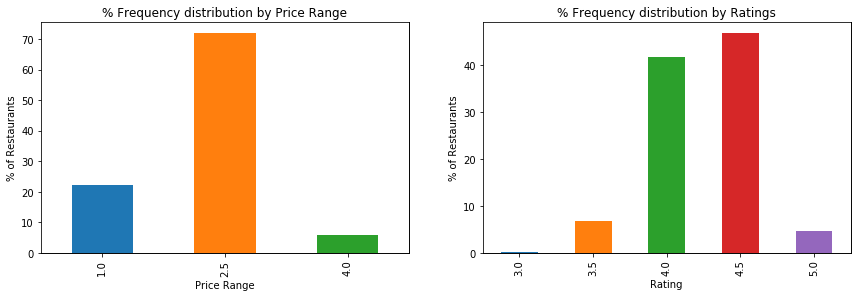

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
plt.setp(ax, xticks=[], xticklabels=[], yticks=[])
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
my_colors = 'rgbkymc' 

ax = fig.add_subplot(1, 2, 1)
df_dedup["Price"].value_counts(normalize=True).mul(100).sort_index().plot.bar()
plt.title('% Frequency distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('% of Restaurants')

ax = fig.add_subplot(1, 2, 2)
df_dedup["Rating"].value_counts(normalize=True).mul(100).sort_index().plot.bar()
plt.title('% Frequency distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('% of Restaurants')

### Correlation between Price Range and Ratings

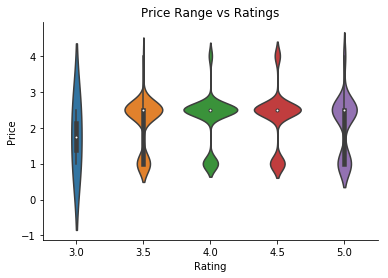

In [6]:
import seaborn as sns 
ax = sns.violinplot(df_dedup['Rating'], df_dedup['Price']) #Variable Plot
ax.set_title('Price Range vs Ratings')
sns.despine()

### Number of 5 star rated restaurants by Cuisine

Text(0.5,1,'Number of 5 star rated restaurants by Cuisine')

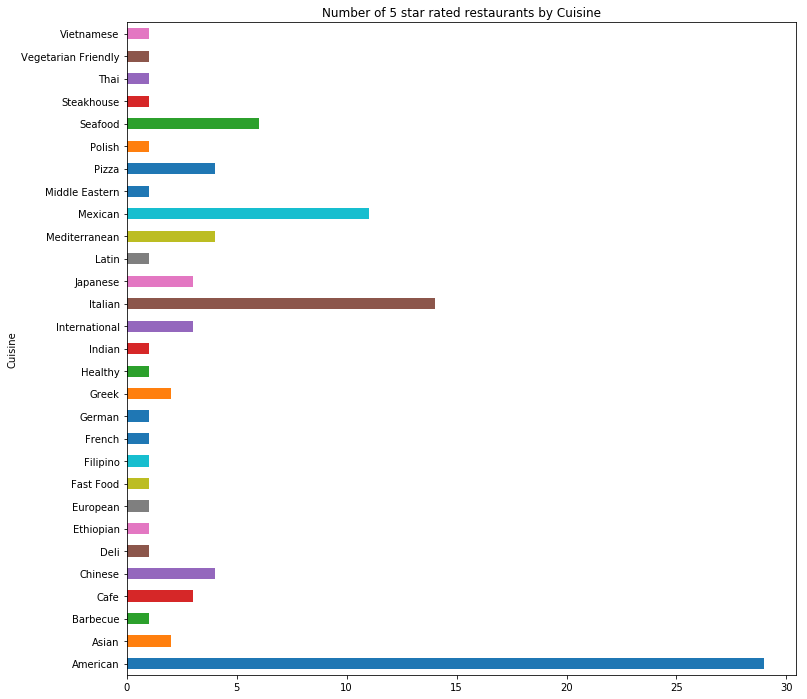

In [7]:
plt.figure(figsize=(12,12))
df_dedup.loc[df_dedup['Rating'] == 5].groupby('Cuisine')['Review Count'].count().plot.barh()
plt.title('Number of 5 star rated restaurants by Cuisine')

### Top Restaurant based on Rating and maximum reviews by Cuisine

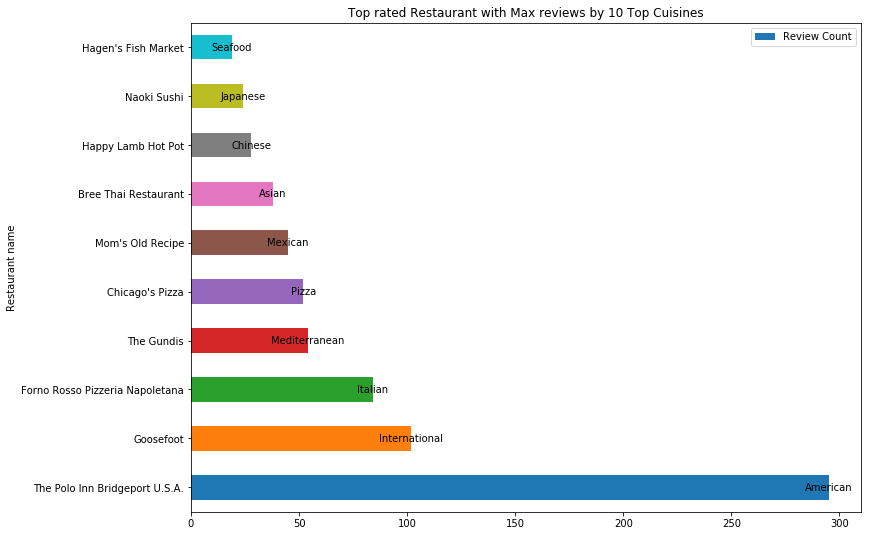

In [8]:
df_new = df_dedup[df_dedup['Rating'] == 5].sort_values('Review Count', ascending=False).drop_duplicates(['Cuisine'])

ax=df_new.iloc[:10,:].plot(y='Review Count', x='Name', kind='barh') 
plt.ylabel('Restaurant name')
plt.title('Top rated Restaurant with Max reviews by 10 Top Cuisines')
plt.gcf().set_size_inches(12, 9)

list_values = df_new['Cuisine'].tolist()

for rect, value in zip(ax.patches, list_values):
    h = rect.get_height() /2.
    w = rect.get_width() 
    x, y = rect.get_xy()
    ax.text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center')